In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# E-10

In [100]:
# Load the data
data = pd.read_csv('data.csv') 

In [101]:
data.fillna(data.mean(), inplace=True)

/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gn/T/ipykernel_42885/1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [102]:
data.dropna(inplace=True)

In [103]:
data_numeric = data.select_dtypes(include=[np.number])

In [104]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 48057
Data columns (total 77 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       39717 non-null  int64  
 1   population                                 39717 non-null  float64
 2   gdp                                        39717 non-null  float64
 3   cement_co2                                 39717 non-null  float64
 4   cement_co2_per_capita                      39717 non-null  float64
 5   co2                                        39717 non-null  float64
 6   co2_growth_abs                             39717 non-null  float64
 7   co2_growth_prct                            39717 non-null  float64
 8   co2_including_luc                          39717 non-null  float64
 9   co2_including_luc_growth_abs               39717 non-null  float64
 10  co2_including_luc_grow

In [105]:
X = data_numeric.drop(columns=['share_global_co2'])
y = data_numeric['share_global_co2']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [109]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [110]:
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))

In [112]:
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)

In [113]:
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])

In [114]:
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)

In [115]:
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)

In [116]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [117]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.4487 - val_loss: 0.4728
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7925 - val_loss: 0.3980
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3738 - val_loss: 0.1852
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2059 - val_loss: 0.4143
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2239 - val_loss: 0.0639
Epoch 6/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1548 - val_loss: 0.0680
Epoch 7/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2010 - val_loss: 0.0777
Epoch 8/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0797 - val_loss: 0.0603
Epoch 9/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1364 - val_loss: 0.1132
Epoch 10/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1442 - val_loss: 0.0613


In [118]:
mse_e10 = model.evaluate([X_test_cnn, X_test], y_test)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0643


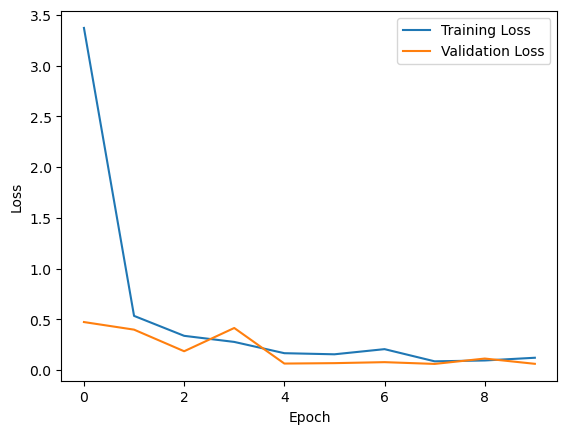

In [119]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [120]:
predictions = model.predict([X_test_cnn, X_test])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


In [121]:
errors = y_test - predictions.flatten()
mae_e10 = np.mean(np.abs(errors))
mse_e10 = np.mean(errors**2)

In [122]:
from sklearn.metrics import r2_score
r2_e10 = r2_score(y_test, predictions)

In [123]:
print("Mean Squared Error:", mse_e10)
print("Mean Absolute Error:", mae_e10)
print("R-squared error:", r2_e10)

Mean Squared Error: 0.06816936299147688
Mean Absolute Error: 0.09519217070316613
R-squared error: 0.9979132466906266


# E-50

In [124]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1393 - val_loss: 0.0464
Epoch 2/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0669 - val_loss: 0.0415
Epoch 3/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0827 - val_loss: 0.1560
Epoch 4/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0856 - val_loss: 0.0672
Epoch 5/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0876 - val_loss: 0.0311
Epoch 6/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0898 - val_loss: 0.0361
Epoch 7/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0940 - val_loss: 0.0955
Epoch 8/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1604 - val_loss: 0.1002
Epoch 9/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0546 - val_loss: 0.0460
Epoch 10/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0532 - val_loss: 0.1802
Epoch 11/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0826 - val_loss: 0.0225
Epoch 12/50
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [125]:
mse_e50 = model.evaluate([X_test_cnn, X_test], y_test)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 0.1007


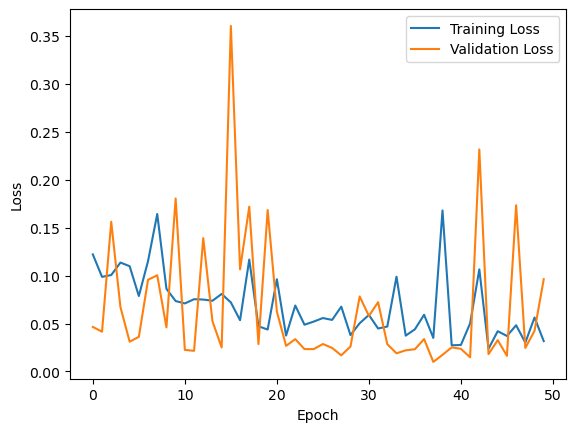

In [126]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [127]:
predictions = model.predict([X_test_cnn, X_test])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


In [128]:
errors = y_test - predictions.flatten()
mae_e50 = np.mean(np.abs(errors))
mse_e50 = np.mean(errors**2)

In [129]:
from sklearn.metrics import r2_score
r2_e50 = r2_score(y_test, predictions)

In [130]:
print("Mean Squared Error:", mse_e50)
print("Mean Absolute Error:", mae_e50)
print("R-squared error:", r2_e50)

Mean Squared Error: 0.08930066713444448
Mean Absolute Error: 0.06273928449028089
R-squared error: 0.9972663898488335


# E-100

In [131]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0351 - val_loss: 0.0281
Epoch 2/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0470 - val_loss: 0.0187
Epoch 3/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0354 - val_loss: 0.0259
Epoch 4/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0179 - val_loss: 0.0254
Epoch 5/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0217 - val_loss: 0.0351
Epoch 6/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0482 - val_loss: 0.0182
Epoch 7/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0205 - val_loss: 0.0254
Epoch 8/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0783 - val_loss: 0.0283
Epoch 9/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0501 - val_loss: 0.0140
Epoch 10/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0173 - val_loss: 0.0437
Epoch 11/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1186 - val_loss: 0.0146
Epoch 12/100
795/795 ━━━━━━━━━━━━━━━━━━━━

795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0114 - val_loss: 0.0294
Epoch 69/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0128 - val_loss: 0.0146
Epoch 70/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0252 - val_loss: 0.0176
Epoch 71/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0808 - val_loss: 0.0172
Epoch 72/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - val_loss: 0.0135
Epoch 73/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0175 - val_loss: 0.0176
Epoch 74/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0230 - val_loss: 0.0376
Epoch 75/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0218 - val_loss: 0.0187
Epoch 76/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0094 - val_loss: 0.0146
Epoch 77/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - val_loss: 0.0134
Epoch 78/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0194 - val_loss: 0.0463
Epoch 79/100
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [132]:
mse_e100 = model.evaluate([X_test_cnn, X_test], y_test)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0125


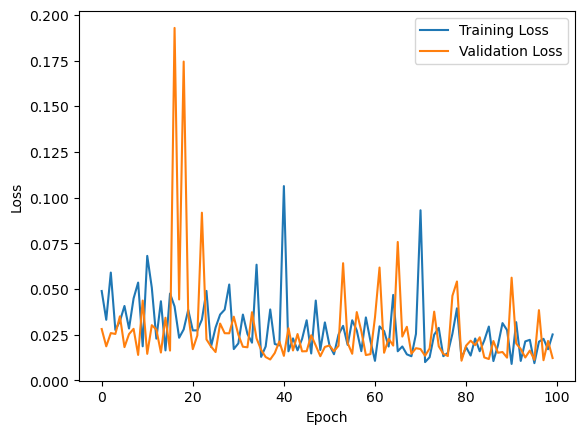

In [133]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [134]:
predictions = model.predict([X_test_cnn, X_test])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step


In [135]:
errors = y_test - predictions.flatten()
mae_e100 = np.mean(np.abs(errors))
mse_e100 = np.mean(errors**2)

In [136]:
from sklearn.metrics import r2_score
r2_e100 = r2_score(y_test, predictions)

In [137]:
print("Mean Squared Error:", mse_e100)
print("Mean Absolute Error:", mae_e100)
print("R-squared error:", r2_e100)

Mean Squared Error: 0.009740480005351992
Mean Absolute Error: 0.03037051476325962
R-squared error: 0.9997018311746789


# E-200

In [138]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0338 - val_loss: 0.0183
Epoch 2/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 3/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0100 - val_loss: 0.0164
Epoch 4/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0136 - val_loss: 0.0409
Epoch 5/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0334 - val_loss: 0.0207
Epoch 6/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - val_loss: 0.0507
Epoch 7/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0254 - val_loss: 0.0263
Epoch 8/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0221 - val_loss: 0.0265
Epoch 9/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - val_loss: 0.0166
Epoch 10/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0153 - val_loss: 0.0089
Epoch 11/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0153 - val_loss: 0.0148
Epoch 12/200
795/795 ━━━━━━━━━━━━━━━━━━━━

795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - val_loss: 0.5656
Epoch 69/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0950 - val_loss: 0.0154
Epoch 70/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0064 - val_loss: 0.0310
Epoch 71/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056 - val_loss: 0.0556
Epoch 72/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0115 - val_loss: 0.0121
Epoch 73/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063 - val_loss: 0.0271
Epoch 74/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086 - val_loss: 0.0554
Epoch 75/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0168 - val_loss: 0.0310
Epoch 76/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0074 - val_loss: 0.0182
Epoch 77/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0098 - val_loss: 0.0245
Epoch 78/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0157 - val_loss: 0.0697
Epoch 79/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 

Epoch 135/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - val_loss: 0.1383
Epoch 136/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0188 - val_loss: 0.1313
Epoch 137/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0089 - val_loss: 0.1669
Epoch 138/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069 - val_loss: 0.1651
Epoch 139/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - val_loss: 0.1560
Epoch 140/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0114 - val_loss: 0.1314
Epoch 141/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106 - val_loss: 0.1994
Epoch 142/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0075 - val_loss: 0.1933
Epoch 143/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071 - val_loss: 0.2536
Epoch 144/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053 - val_loss: 0.2897
Epoch 145/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0048 - val_loss: 0.1299
Epoch 146/200
795/795

In [139]:
mse_e100 = model.evaluate([X_test_cnn, X_test], y_test)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.0096


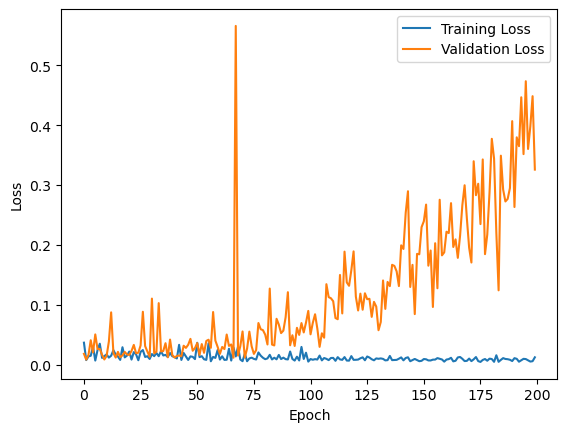

In [140]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [141]:
predictions = model.predict([X_test_cnn, X_test])

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


In [142]:
errors = y_test - predictions.flatten()
mae_e200 = np.mean(np.abs(errors))
mse_e200 = np.mean(errors**2)

In [143]:
from sklearn.metrics import r2_score
r2_e200 = r2_score(y_test, predictions)

In [144]:
print("Mean Squared Error:", mse_e200)
print("Mean Absolute Error:", mae_e200)
print("R-squared error:", r2_e200)

Mean Squared Error: 0.010007885499664231
Mean Absolute Error: 0.024234028028717096
R-squared error: 0.9996936455429565


# Comparision

In [145]:
MSE = []
MAE = []
R = []

MSE.append(mse_e10)
MAE.append(mae_e10)
R.append(r2_e10)

MSE.append(mse_e50)
MAE.append(mae_e50)
R.append(r2_e50)

MSE.append(mse_e100)
MAE.append(mae_e100)
R.append(r2_e100)

MSE.append(mse_e200)
MAE.append(mae_e200)
R.append(r2_e200)

In [146]:
Name = ["epoch-10", "epoch-50","epoch-100","epoch-200"]

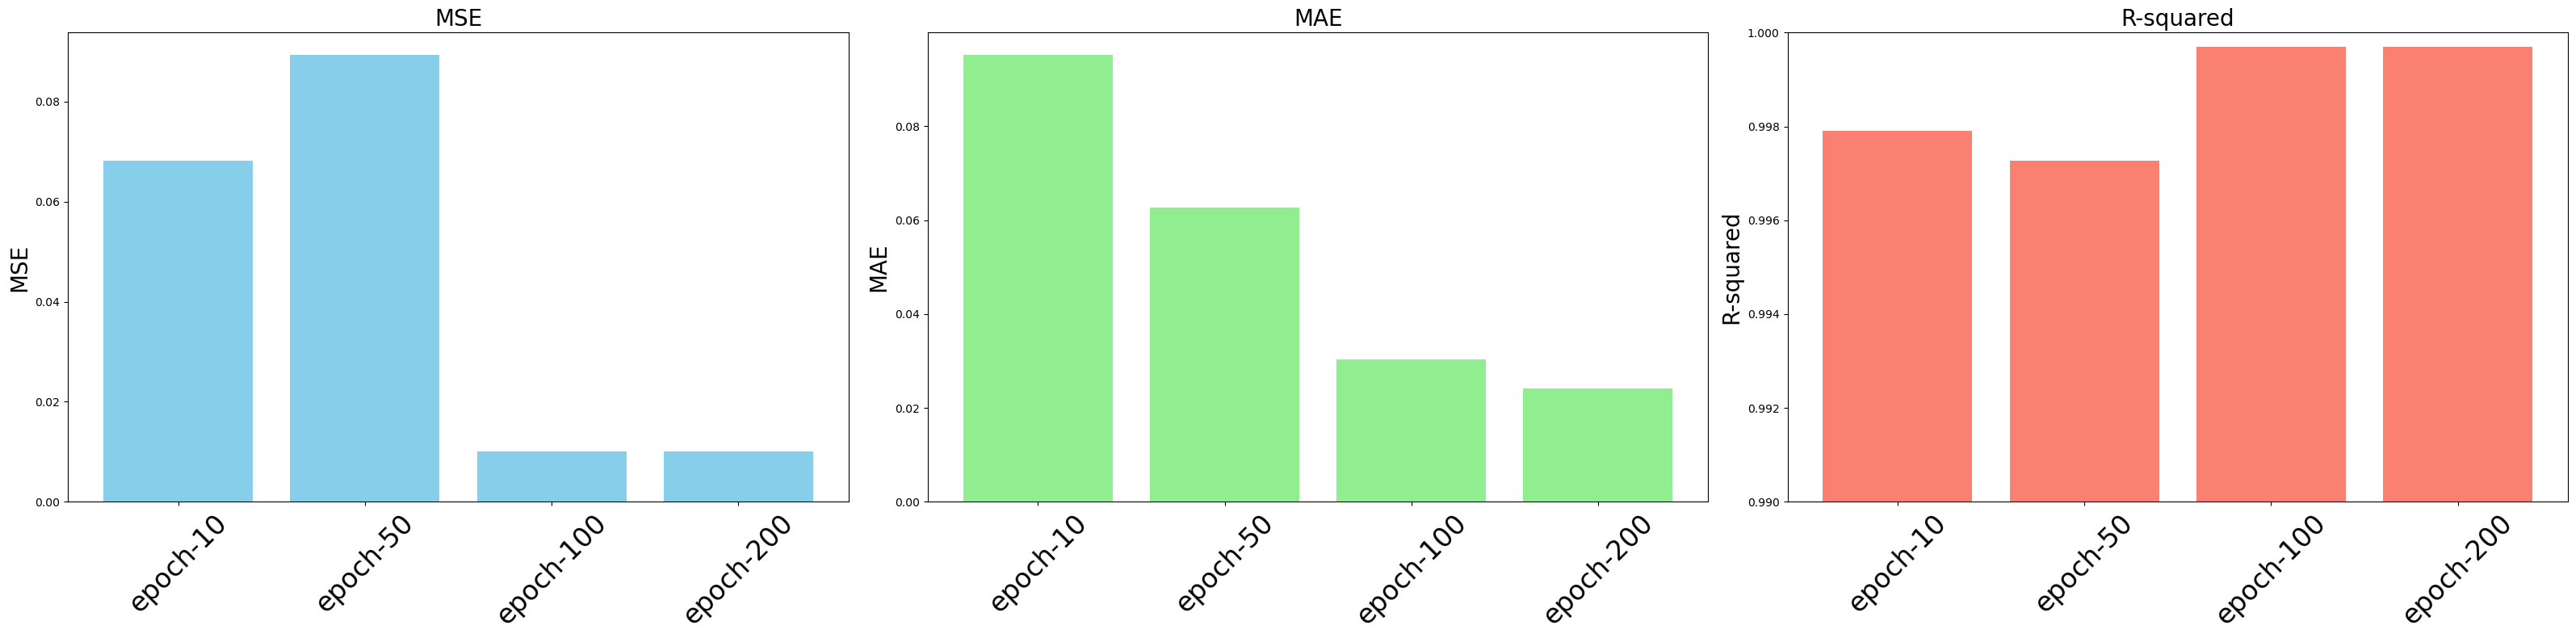

In [147]:
fig, axs = plt.subplots(1, 3, figsize=(32, 8))
# Plotting MSE
axs[0].bar(Name, MSE, color='skyblue')
axs[0].set_title('MSE', fontsize=20)
axs[0].set_ylabel('MSE', fontsize=20)
axs[0].tick_params(axis='x', rotation=45, labelsize=24)

# Plotting MAE
axs[1].bar(Name, MAE, color='lightgreen')
axs[1].set_title('MAE', fontsize=20)
axs[1].set_ylabel('MAE', fontsize=20)
axs[1].tick_params(axis='x', rotation=45, labelsize=24)

# Plotting R-squared
axs[2].bar(Name, R, color='salmon')
axs[2].set_title('R-squared', fontsize=20)
axs[2].set_ylabel('R-squared', fontsize=20)
axs[2].tick_params(axis='x', rotation=45, labelsize=24)
axs[2].set_ylim(0.99, 1)

plt.tight_layout()
plt.show()

# MSE plot

In [55]:
import matplotlib.pyplot as plt

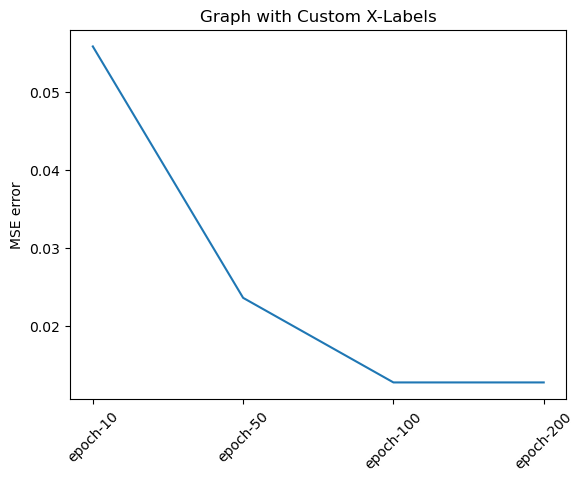

In [56]:
plt.plot(MSE)
plt.xticks(range(len(MSE)), Name, rotation=45)
plt.ylabel('MSE error')
plt.title('Graph with Custom Epoch')
plt.show()

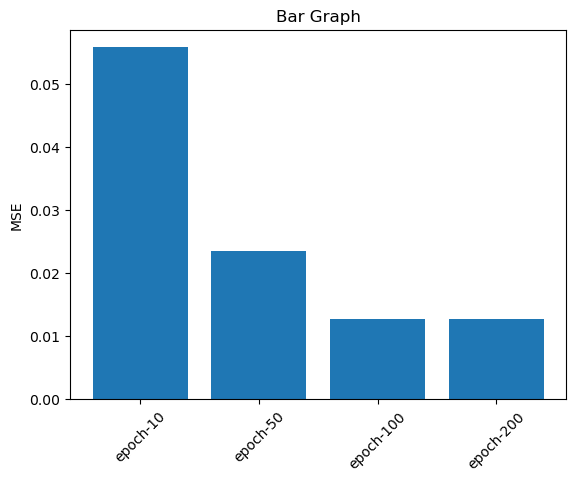

In [58]:
plt.bar(Name,MSE)
plt.xticks(rotation=45)
plt.ylabel('MSE')
plt.title('Bar Graph')
plt.show()

# MAE plot

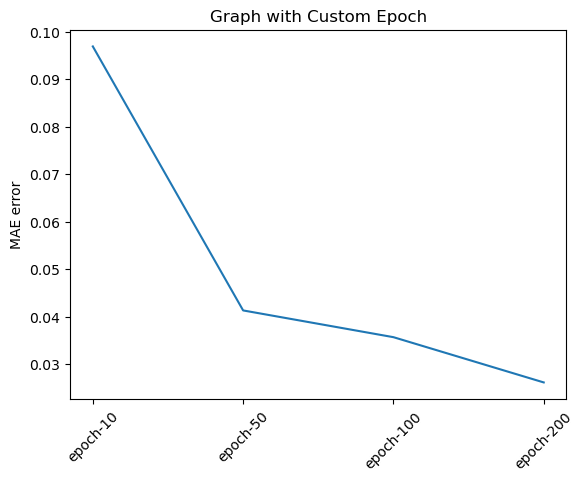

In [60]:
plt.plot(MAE)
plt.xticks(range(len(MAE)), Name, rotation=45)
plt.ylabel('MAE error')
plt.title('Graph with Custom Epoch')
plt.show()

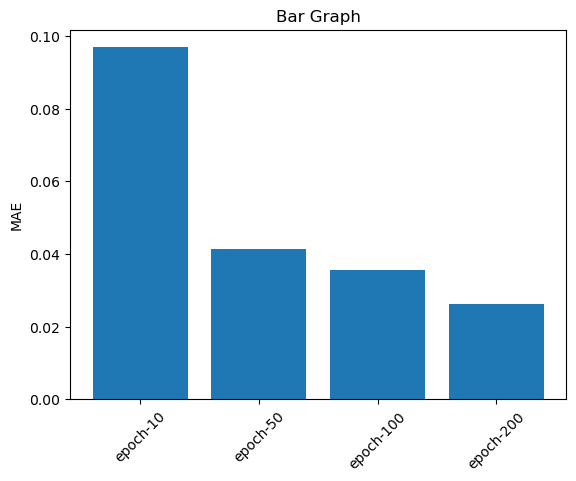

In [62]:
plt.bar(Name,MAE)
plt.xticks(rotation=45)
plt.ylabel('MAE')
plt.title('Bar Graph')
plt.show()

# R-squared 

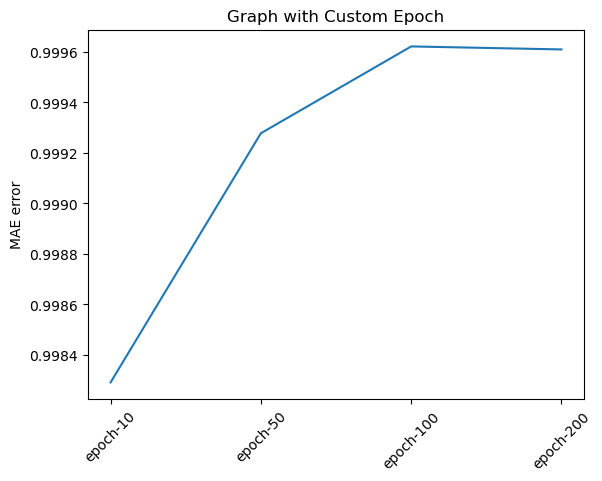

In [63]:
plt.plot(R)
plt.xticks(range(len(R)), Name, rotation=45)
plt.ylabel('MAE error')
plt.title('Graph with Custom Epoch')
plt.show()

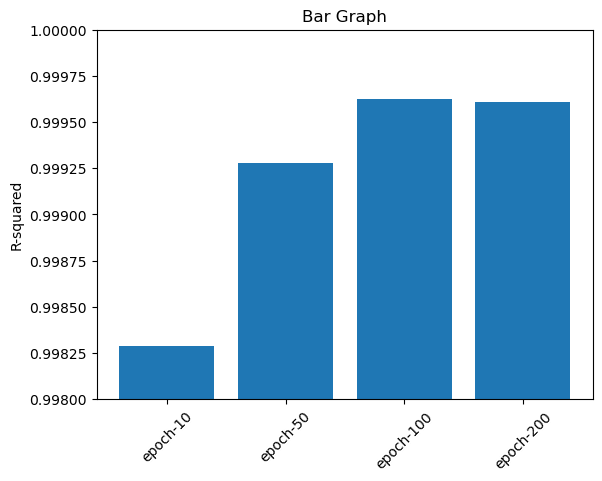

In [65]:
plt.bar(Name,R)
plt.ylim(0.998, 1.0)
plt.xticks(rotation=45)
plt.ylabel('R-squared')
plt.title('Bar Graph')
plt.show()

# Team models

In [1]:
MSE =[0.0121,0.11418,0.0768,0.0038]
MAE =[0.027928,0.0182,0.00949,0.035411]
R = [0.99962,0.9338,0.875,0.88920]
Name = ["Hybrid CNN-ANN","Hybrid CNN-IBFA","SVR","LSTM"]

In [2]:
import matplotlib.pyplot as plt

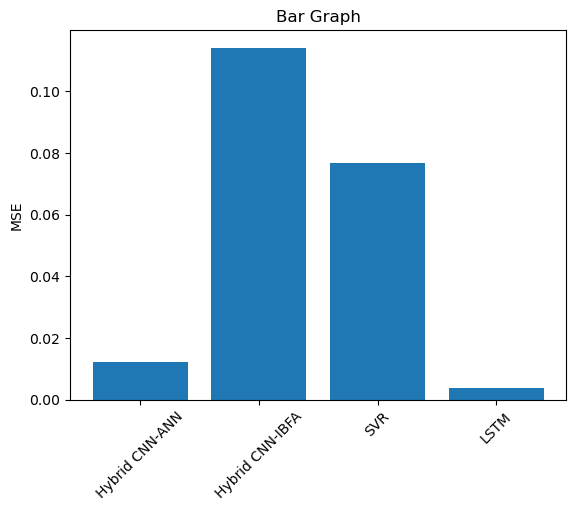

In [3]:
plt.bar(Name,MSE)
plt.xticks(rotation=45)
plt.ylabel('MSE')
plt.title('Bar Graph')
plt.show()

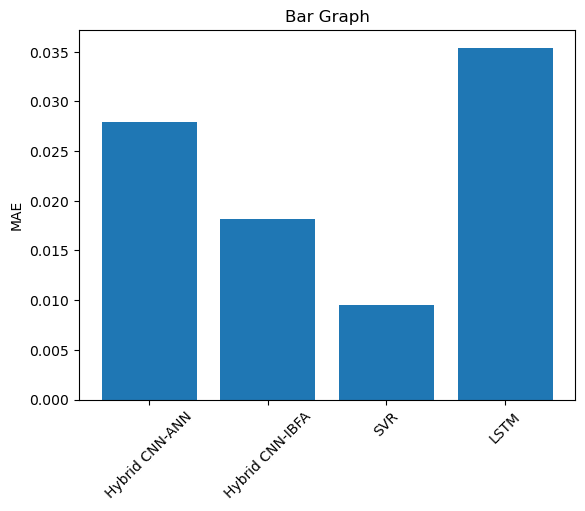

In [4]:
plt.bar(Name,MAE)
plt.xticks(rotation=45)
plt.ylabel('MAE')
plt.title('Bar Graph')
plt.show()

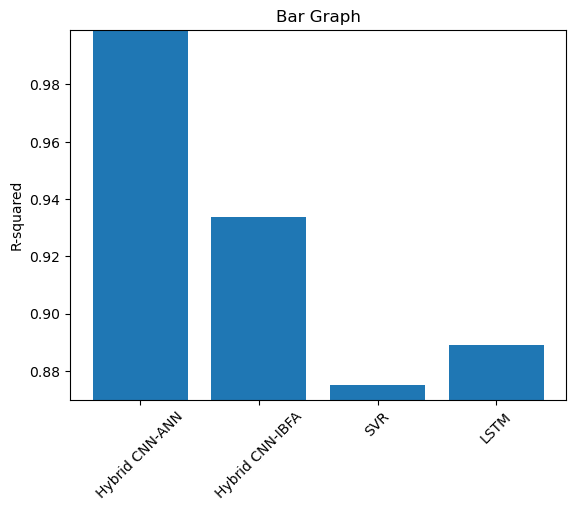

In [9]:
plt.bar(Name,R)
plt.ylim(0.87, 0.999)
plt.xticks(rotation=45)
plt.ylabel('R-squared')
plt.title('Bar Graph')
plt.show()

# hyper parameters tuming 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [11]:
# Load the data
data = pd.read_csv('data.csv') 

In [12]:
data.dropna(inplace=True)

In [13]:
data_numeric = data.select_dtypes(include=[np.number])

In [14]:
X = data_numeric.drop(columns=['share_global_co2'])
y = data_numeric['share_global_co2']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

filters == 64

In [21]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_f64 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.7941 - val_loss: 0.6747
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8628 - val_loss: 0.3408
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3831 - val_loss: 0.1908
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2686 - val_loss: 0.3408
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2411 - val_loss: 0.1294
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1157 - val_loss: 0.0804
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0513 - val_loss: 0.0651
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0557 - val_loss: 0.0422
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0337 - val_loss: 0.0384
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0233 - val_loss: 0.0261
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - val_loss: 0.0354
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1218 - val_loss: 0.0556
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0375 - val_loss: 0.0278
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - val_loss: 0.0176
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - val_loss: 0.0523
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 - val_loss: 0.0488
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174 - val_loss: 0.0113
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - val_loss: 0.0150
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - val_loss: 0.0143
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0136
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0134
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - val_loss: 0.0118
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 

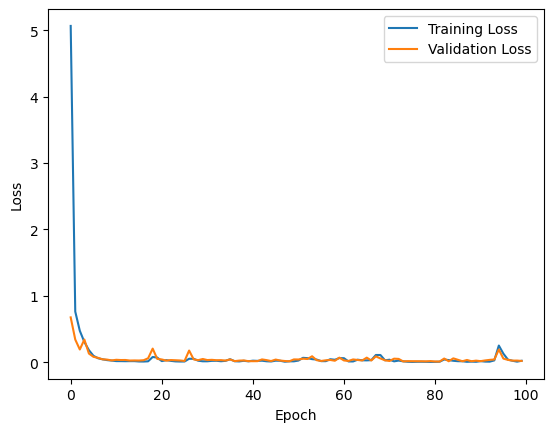

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_f64 = np.mean(np.abs(errors))
mse_f64 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_f64 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_f64)
print("Mean Absolute Error:", mae_f64)
print("R-squared error:", r2_f64)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error: 0.023705033291941485
Mean Absolute Error: 0.08826632518288094
R-squared error: 0.9988237923863141


filters == 32

In [27]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_f32 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0214 - val_loss: 0.0206
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - val_loss: 0.0228
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - val_loss: 0.0180
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0221
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085 - val_loss: 0.0175
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0201
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0357
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0203 - val_loss: 0.0824
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402 - val_loss: 0.0345
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192 - val_loss: 0.0413
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0212
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0194
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0168
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0211
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272 - val_loss: 0.0311
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255 - val_loss: 0.0628
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0282 - val_loss: 0.0098
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - val_loss: 0.0168
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 - val_loss: 0.0339
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0306
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0399 - val_loss: 0.0210
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0163
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 

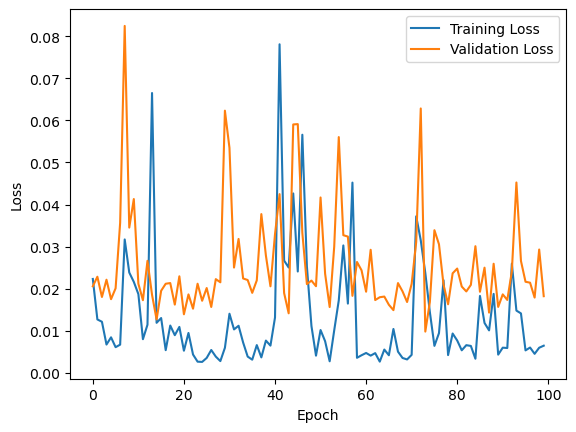

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_f32 = np.mean(np.abs(errors))
mse_f32 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_f32 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_f32)
print("Mean Absolute Error:", mae_f32)
print("R-squared error:", r2_f32)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.03442359773522116
Mean Absolute Error: 0.06537517473572176
R-squared error: 0.9982919535590616


filter == 16

In [38]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_f16 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.6890 - val_loss: 1.5974
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1147 - val_loss: 0.3886
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4048 - val_loss: 0.2390
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2415 - val_loss: 0.1492
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2347 - val_loss: 0.1589
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2533 - val_loss: 0.0725
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0729 - val_loss: 0.0803
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0899 - val_loss: 0.0592
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0271 - val_loss: 0.0355
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0280 - val_loss: 0.0330
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287 - val_loss: 0.0427
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - val_loss: 0.0175
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0120 - val_loss: 0.0286
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0332
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0433
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0122 - val_loss: 0.0203
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0067 - val_loss: 0.0232
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0243
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0142 - val_loss: 0.0224
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - val_loss: 0.0203
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - val_loss: 0.0220
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0232
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 

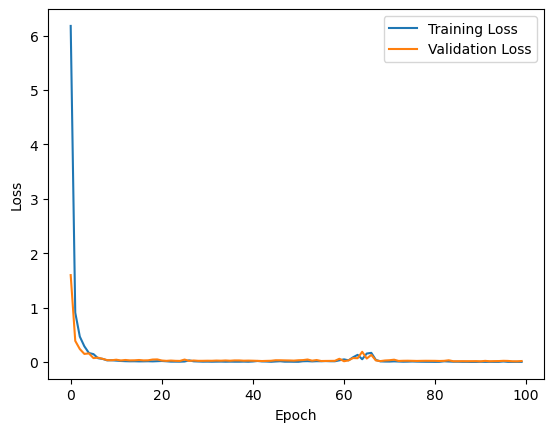

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_f16 = np.mean(np.abs(errors))
mse_f16 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_f16 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_f16)
print("Mean Absolute Error:", mae_f16)
print("R-squared error:", r2_f16)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error: 0.03484436224076521
Mean Absolute Error: 0.07337454897865109
R-squared error: 0.9982710758657509


filter == 8

In [43]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_f8 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.2258 - val_loss: 0.8068
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7806 - val_loss: 0.2440
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2496 - val_loss: 0.1446
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1888 - val_loss: 0.1806
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1870 - val_loss: 0.0914
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0813 - val_loss: 0.0701
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0606 - val_loss: 0.0495
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0347 - val_loss: 0.0726
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0403 - val_loss: 0.0427
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 - val_loss: 0.0373
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 - val_loss: 0.0399
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0176 - val_loss: 0.0300
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0289
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - val_loss: 0.0212
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0195
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0099 - val_loss: 0.0453
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0318 - val_loss: 0.1087
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0598 - val_loss: 0.0259
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0146
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093 - val_loss: 0.0289
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 - val_loss: 0.0285
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - val_loss: 0.0454
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 

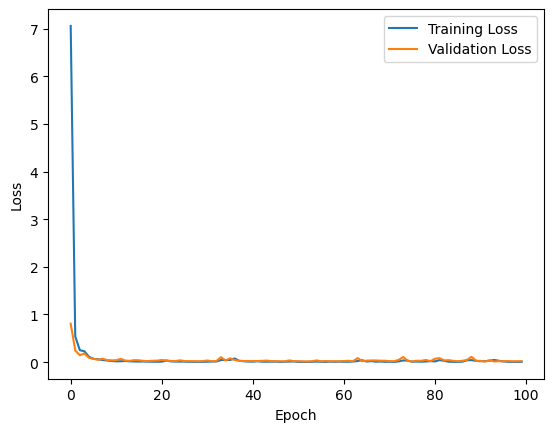

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_f8 = np.mean(np.abs(errors))
mse_f8 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_f8 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_f8)
print("Mean Absolute Error:", mae_f8)
print("R-squared error:", r2_f8)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.016860857666592625
Mean Absolute Error: 0.0631385017317316
R-squared error: 0.9991633899469163


In [47]:
MSE = []
MAE = []
R = []

MSE.append(mse_f64)
MAE.append(mae_f64)
R.append(r2_f64)

MSE.append(mse_f32)
MAE.append(mae_f32)
R.append(r2_f32)

MSE.append(mse_f16)
MAE.append(mae_f16)
R.append(r2_f16)

MSE.append(mse_f8)
MAE.append(mae_f8)
R.append(r2_f8)

In [48]:
Name = ["Filter=64","Filter=32","Filter=16","Filter=8"]

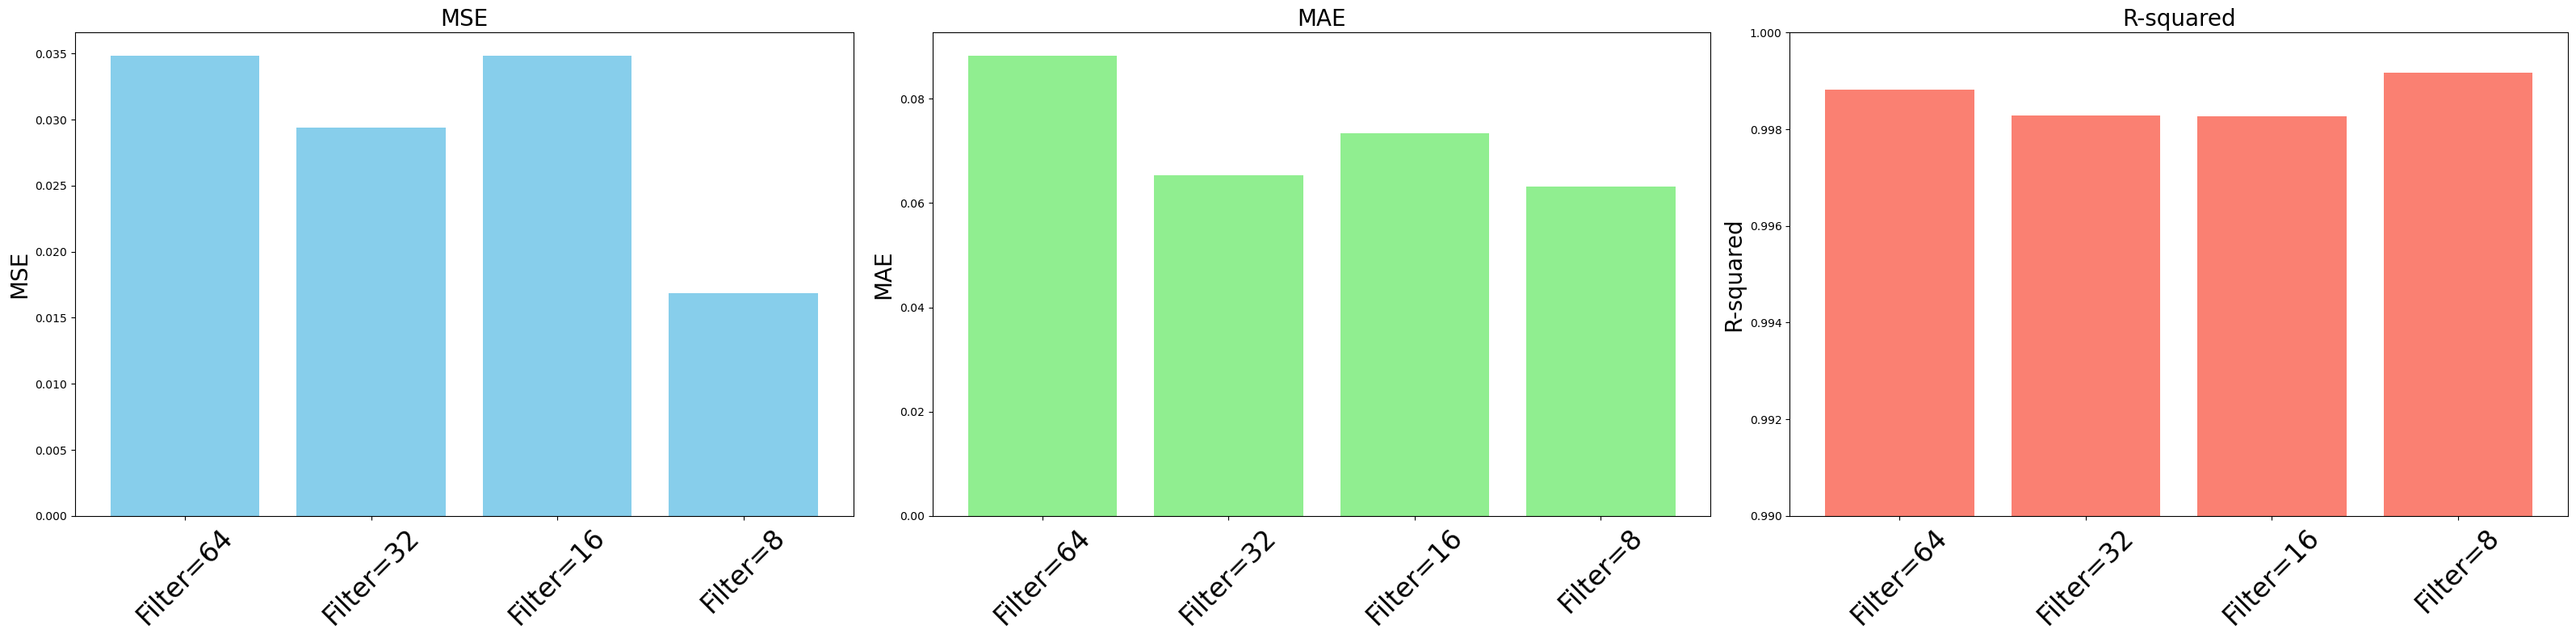

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(32, 8))
# Plotting MSE
axs[0].bar(Name, MSE, color='skyblue')
axs[0].set_title('MSE', fontsize=20)
axs[0].set_ylabel('MSE', fontsize=20)
axs[0].tick_params(axis='x', rotation=45, labelsize=24)

# Plotting MAE
axs[1].bar(Name, MAE, color='lightgreen')
axs[1].set_title('MAE', fontsize=20)
axs[1].set_ylabel('MAE', fontsize=20)
axs[1].tick_params(axis='x', rotation=45, labelsize=24)

# Plotting R-squared
axs[2].bar(Name, R, color='salmon')
axs[2].set_title('R-squared', fontsize=20)
axs[2].set_ylabel('R-squared', fontsize=20)
axs[2].tick_params(axis='x', rotation=45, labelsize=24)
axs[2].set_ylim(0.99, 1)

plt.tight_layout()
plt.show()

kernal size = 3

In [63]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_k3 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.8676 - val_loss: 0.7979
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9611 - val_loss: 0.4032
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6796 - val_loss: 0.3429
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3049 - val_loss: 0.1954
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1839 - val_loss: 0.1091
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0991 - val_loss: 0.1089
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0695 - val_loss: 0.0595
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0513 - val_loss: 0.0420
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0374 - val_loss: 0.0420
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218 - val_loss: 0.0521
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0391 - val_loss: 0.0422
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0119 - val_loss: 0.0153
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0174
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0275 - val_loss: 0.0246
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0238 - val_loss: 0.0354
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0332 - val_loss: 0.0174
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0248
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0145 - val_loss: 0.0125
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0258
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - val_loss: 0.0170
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103 - val_loss: 0.0474
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0221 - val_loss: 0.0201
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084 

In [65]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_k3 = np.mean(np.abs(errors))
mse_k3 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_k3 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_k3)
print("Mean Absolute Error:", mae_k3)
print("R-squared error:", r2_k3)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.18542588428847764
Mean Absolute Error: 0.15887317530985784
R-squared error: 0.9907994503028736


kernal size = 4

In [66]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=4, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_k4 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0225
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - val_loss: 0.0236
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - val_loss: 0.0173
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_loss: 0.0188
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084 - val_loss: 0.0302
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055 - val_loss: 0.0120
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0192
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0241
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0201
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0149
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0229
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1032 - val_loss: 0.0335
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0469 - val_loss: 0.0472
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0702 - val_loss: 0.0656
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0302 - val_loss: 0.0166
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0130 - val_loss: 0.0110
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0085
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0210
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0113
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0146
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0143
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0103
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 

In [69]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_k4 = np.mean(np.abs(errors))
mse_k4 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_k4 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_k4)
print("Mean Absolute Error:", mae_k4)
print("R-squared error:", r2_k4)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.022264799757766504
Mean Absolute Error: 0.05758269404387667
R-squared error: 0.9988952545786477


kernal size = 5

In [70]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_k5 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.3922 - val_loss: 1.6176
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6935 - val_loss: 0.5876
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0279 - val_loss: 0.3030
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4052 - val_loss: 0.2174
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2592 - val_loss: 0.1863
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2134 - val_loss: 0.1133
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1079 - val_loss: 0.1055
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0795 - val_loss: 0.0990
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0381 - val_loss: 0.0653
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0549 - val_loss: 0.0424
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 - val_loss: 0.0382
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0272
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0123 - val_loss: 0.0230
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - val_loss: 0.0184
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0214
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - val_loss: 0.0142
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 - val_loss: 0.0144
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0099 - val_loss: 0.0159
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - val_loss: 0.0241
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0117 - val_loss: 0.0163
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - val_loss: 0.0353
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0110 - val_loss: 0.0211
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 

In [72]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_k5 = np.mean(np.abs(errors))
mse_k5 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_k5 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_k5)
print("Mean Absolute Error:", mae_k5)
print("R-squared error:", r2_k5)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.02863964617959478
Mean Absolute Error: 0.06655050485891852
R-squared error: 0.9985789444176331


kernal size = 10

In [73]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=10, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_k10 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.3593 - val_loss: 1.2816
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8315 - val_loss: 0.4289
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4261 - val_loss: 0.2998
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2483 - val_loss: 0.2272
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1346 - val_loss: 0.1655
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0982 - val_loss: 0.1316
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0854 - val_loss: 0.1370
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0855 - val_loss: 0.1435
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0948 - val_loss: 0.0569
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0447 - val_loss: 0.0537
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228 - val_loss: 0.0530
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - val_loss: 0.0153
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0131 - val_loss: 0.0160
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0102
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - val_loss: 0.0089
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - val_loss: 0.0126
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0674
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0359 - val_loss: 0.0291
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0971 - val_loss: 0.0594
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0374 - val_loss: 0.0516
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0207 - val_loss: 0.0225
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 

In [75]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_k10 = np.mean(np.abs(errors))
mse_k10 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_k10 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_k10)
print("Mean Absolute Error:", mae_k10)
print("R-squared error:", r2_k10)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.01470065496570651
Mean Absolute Error: 0.05684660063183259
R-squared error: 0.9992705759117111


In [76]:
MSE = []
MAE = []
R = []

MSE.append(mse_k3)
MAE.append(mae_k3)
R.append(r2_k3)

MSE.append(mse_k4)
MAE.append(mae_k4)
R.append(r2_k4)

MSE.append(mse_k5)
MAE.append(mae_k5)
R.append(r2_k5)

MSE.append(mse_k10)
MAE.append(mae_k10)
R.append(r2_k10)

In [77]:
Name = ["Kernal=3","Kernal=4","Kernal=5","Kernal=10"]

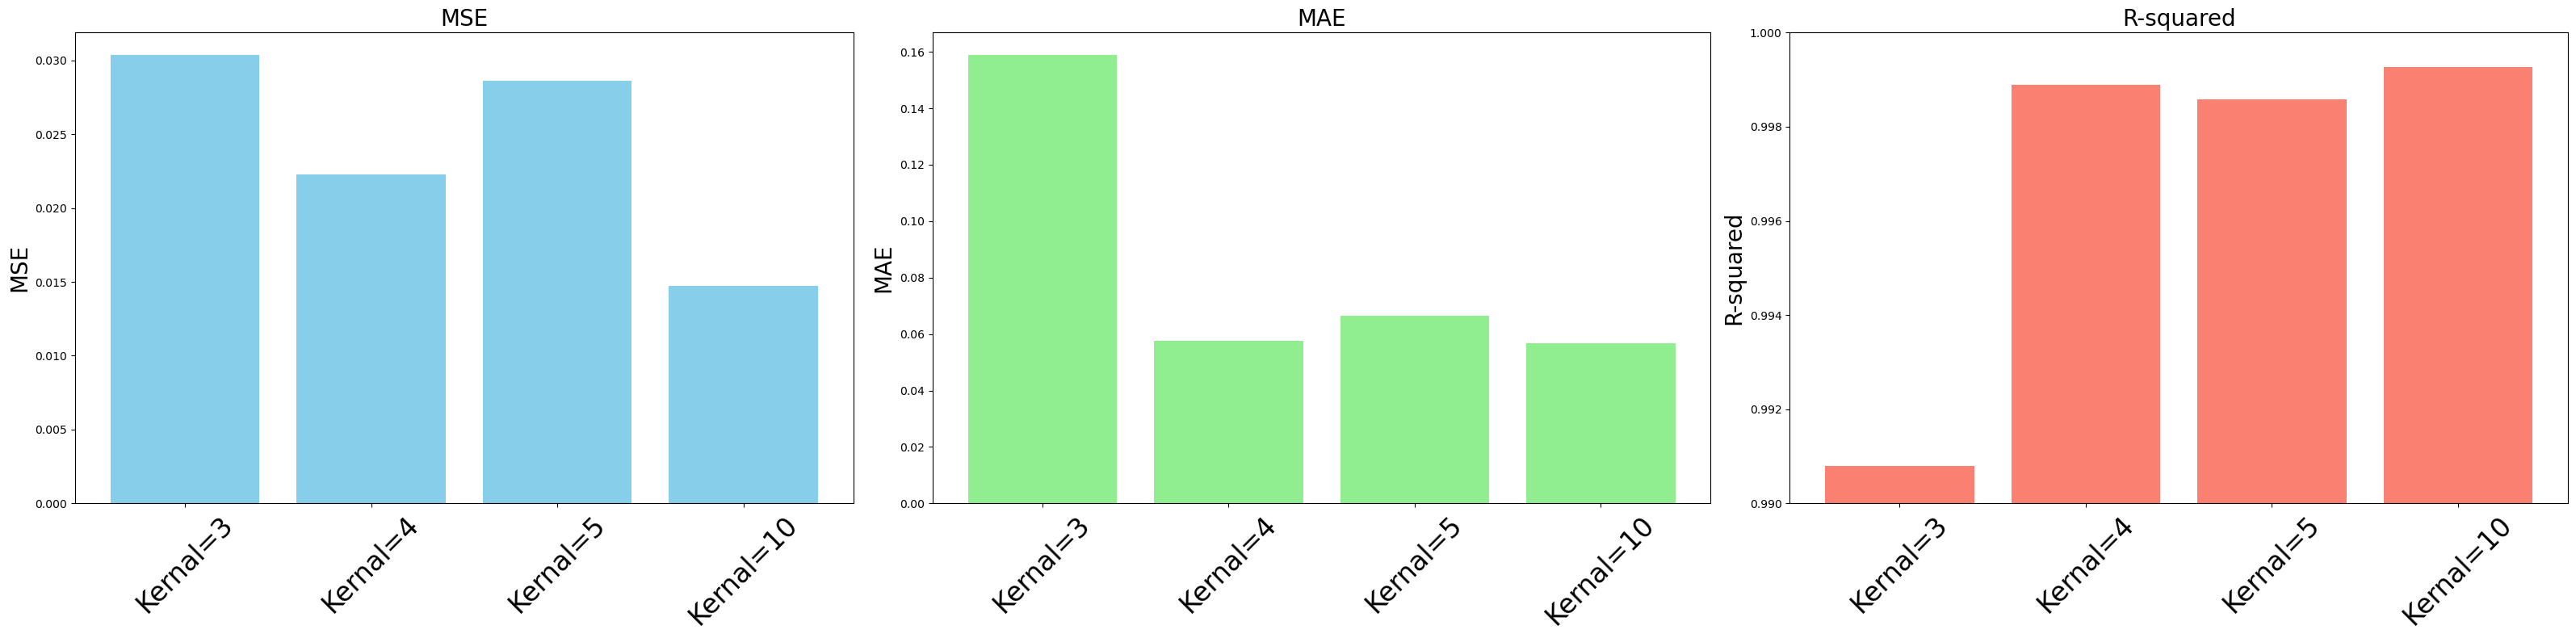

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(32, 8))
# Plotting MSE
axs[0].bar(Name, MSE, color='skyblue')
axs[0].set_title('MSE', fontsize=20)
axs[0].set_ylabel('MSE', fontsize=20)
axs[0].tick_params(axis='x', rotation=45, labelsize=24)

# Plotting MAE
axs[1].bar(Name, MAE, color='lightgreen')
axs[1].set_title('MAE', fontsize=20)
axs[1].set_ylabel('MAE', fontsize=20)
axs[1].tick_params(axis='x', rotation=45, labelsize=24)

# Plotting R-squared
axs[2].bar(Name, R, color='salmon')
axs[2].set_title('R-squared', fontsize=20)
axs[2].set_ylabel('R-squared', fontsize=20)
axs[2].tick_params(axis='x', rotation=45, labelsize=24)
axs[2].set_ylim(0.99, 1)

plt.tight_layout()
plt.show()

Pool size = 2

In [79]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=10, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_p2 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.1797 - val_loss: 1.5264
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3839 - val_loss: 0.6699
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8878 - val_loss: 0.4843
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3997 - val_loss: 0.2814
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1648 - val_loss: 0.1360
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0969 - val_loss: 0.0980
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1215 - val_loss: 0.0931
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0718 - val_loss: 0.1071
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0553 - val_loss: 0.0607
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - val_loss: 0.0665
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256 - val_loss: 0.0528
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0288 - val_loss: 0.1045
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0274 - val_loss: 0.0298
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0235 - val_loss: 0.0112
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - val_loss: 0.0268
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107 - val_loss: 0.0228
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0175
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0191
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0289
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - val_loss: 0.0159
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - val_loss: 0.0206
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0132
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 

In [81]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_p2 = np.mean(np.abs(errors))
mse_p2 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_p2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_p2)
print("Mean Absolute Error:", mae_p2)
print("R-squared error:", r2_p2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.02360380532594218
Mean Absolute Error: 0.08239956985733769
R-squared error: 0.9988288151636653


pool size = 5 

In [82]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=10, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=5),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_p5 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0275
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - val_loss: 0.0262
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0174
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0241
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0075 - val_loss: 0.0147
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0155
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0155
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0141
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0148
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0138
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0213
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0257 - val_loss: 0.0202
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0143 - val_loss: 0.0149
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - val_loss: 0.0183
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0239
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - val_loss: 0.0167
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0154
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 - val_loss: 0.0207
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0121
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042 - val_loss: 0.0191
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0144 - val_loss: 0.0723
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0679 - val_loss: 0.0472
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0231 

In [85]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_p5 = np.mean(np.abs(errors))
mse_p5 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_p5 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_p5)
print("Mean Absolute Error:", mae_p5)
print("R-squared error:", r2_p5)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.012753492579635149
Mean Absolute Error: 0.050160934022804984
R-squared error: 0.999367191140864


Pool size = 10

In [86]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=10, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=10),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/Users/admin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_p10 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.0715 - val_loss: 3.2805
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8201 - val_loss: 0.6668
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5111 - val_loss: 0.3851
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3897 - val_loss: 0.6008
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5961 - val_loss: 0.5063
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1612 - val_loss: 0.1766
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1645 - val_loss: 0.1392
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0943 - val_loss: 0.1303
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0566 - val_loss: 0.1018
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0682 - val_loss: 0.0952
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0570 - val_loss: 0.0819
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - val_loss: 0.0400
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 - val_loss: 0.0343
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0322
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0317
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0289
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0162 - val_loss: 0.0484
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0164 - val_loss: 0.1150
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0435 - val_loss: 0.0417
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0148 - val_loss: 0.0362
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 - val_loss: 0.0328
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150 - val_loss: 0.0371
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0374 

In [88]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_p10 = np.mean(np.abs(errors))
mse_p10 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_p10 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_p10)
print("Mean Absolute Error:", mae_p10)
print("R-squared error:", r2_p10)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.05397846964140338
Mean Absolute Error: 0.10085829066096047
R-squared error: 0.9973216706264271


Pool size = 20

In [91]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=16, kernel_size=10, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=20),
    tf.keras.layers.Flatten()
])
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
])
cnn_input = tf.keras.layers.Input(shape=(X_train_cnn.shape[1], 1))
ann_input = tf.keras.layers.Input(shape=(X_train.shape[1],))
cnn_output = cnn_model(cnn_input)
ann_output = ann_model(ann_input)
combined_output = tf.keras.layers.concatenate([cnn_output, ann_output])
combined_output = tf.keras.layers.Dense(32, activation='relu')(combined_output)
output = tf.keras.layers.Dense(1)(combined_output)
model = tf.keras.models.Model(inputs=[cnn_input, ann_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

In [93]:
history = model.fit([X_train_cnn, X_train], y_train, epochs=100, batch_size=32, validation_split=0.2)
mse_p20 = model.evaluate([X_test_cnn, X_test], y_test)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 - val_loss: 0.0157
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - val_loss: 0.0232
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0066 - val_loss: 0.0291
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 - val_loss: 0.0126
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - val_loss: 0.0295
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0087 - val_loss: 0.0132
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - val_loss: 0.0334
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0187 - val_loss: 0.0082
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0092
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 - val_loss: 0.0102
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0133
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0228
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 - val_loss: 0.0131
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080 - val_loss: 0.0271
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 - val_loss: 0.0110
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0095
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - val_loss: 0.0133
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0098
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068 - val_loss: 0.0214
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - val_loss: 0.0105
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0134
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0109
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 

In [94]:
predictions = model.predict([X_test_cnn, X_test])
errors = y_test - predictions.flatten()
mae_p20 = np.mean(np.abs(errors))
mse_p20 = np.mean(errors**2)
from sklearn.metrics import r2_score
r2_p20 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse_p20)
print("Mean Absolute Error:", mae_p20)
print("R-squared error:", r2_p20)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error: 0.012624992862127612
Mean Absolute Error: 0.05953013366303946
R-squared error: 0.9993735671009493


In [96]:
MSE = []
MAE = []
R = []

MSE.append(mse_p2)
MAE.append(mae_p2)
R.append(r2_p2)

MSE.append(mse_p5)
MAE.append(mae_p5)
R.append(r2_p5)

MSE.append(mse_p10)
MAE.append(mae_p10)
R.append(r2_p10)

MSE.append(mse_p20)
MAE.append(mae_p20)
R.append(r2_p20)

In [97]:
Name = ["Pool Size=2","Pool Size=5","Pool Size=10","Pool Size=20"]

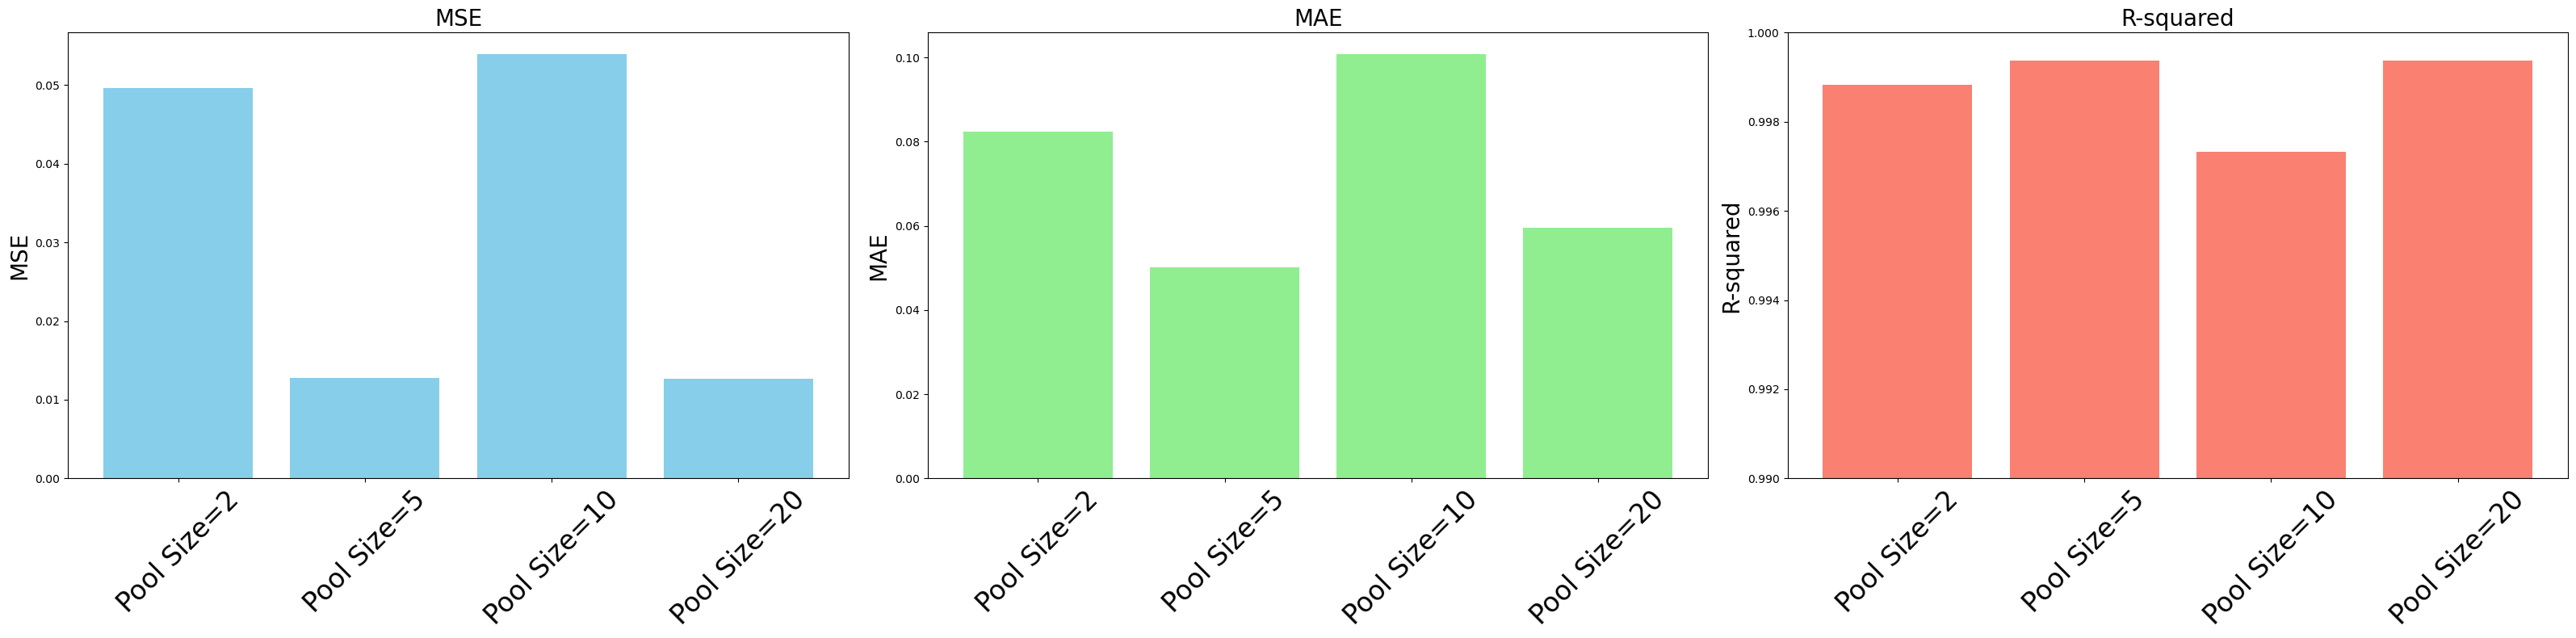

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(32, 8))
# Plotting MSE
axs[0].bar(Name, MSE, color='skyblue')
axs[0].set_title('MSE', fontsize=20)
axs[0].set_ylabel('MSE', fontsize=20)
axs[0].tick_params(axis='x', rotation=45, labelsize=24)

# Plotting MAE
axs[1].bar(Name, MAE, color='lightgreen')
axs[1].set_title('MAE', fontsize=20)
axs[1].set_ylabel('MAE', fontsize=20)
axs[1].tick_params(axis='x', rotation=45, labelsize=24)

# Plotting R-squared
axs[2].bar(Name, R, color='salmon')
axs[2].set_title('R-squared', fontsize=20)
axs[2].set_ylabel('R-squared', fontsize=20)
axs[2].tick_params(axis='x', rotation=45, labelsize=24)
axs[2].set_ylim(0.99, 1)

plt.tight_layout()
plt.show()